In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pydot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.core.display import Image 

# sklearn 패키지로부터 import tree 
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/전처리완료_merged_6.csv의 사본')

In [ ]:
#  data = pd.read_csv('/content/drive/MyDrive/dsl-clustering project/김한빈/전처리완료_merged_6.csv')

In [ ]:
data.head(2)

Unnamed: 0     상장주식수       등락률     거래량_x    거래대금_x  온실가스 배출량(tCO2-eq)  \
0           0  0.004819  0.190183  0.003631  0.010860           0.001123   
1           1  0.002911  0.129244  0.003134  0.009055           0.015149   

   에너지 사용량(TJ)      자산총계       자본금      자본총계  ...  온실가스/매출액      상장기간  회사명  \
0     0.003644  0.001170  0.003109  0.001530  ...  0.026214  0.000000   94   
1     0.022494  0.001227  0.001797  0.001526  ...  0.000000  0.001423  554   

    업종  지역  시장구분  ESG등급  환경  사회  지배구조  
0  126  16     1      3   3   2     3  
1   79   8     1      4   4   2     2  

[2 rows x 28 columns]

In [ ]:
data.columns

Index(['Unnamed: 0', '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가',
       '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종',
       '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조'],
      dtype='object')

In [ ]:
data = data.fillna(0)

In [ ]:
X = data[[ '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가',
       '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종',
       '지역', '시장구분']].to_numpy()

y_ESG = data[['ESG등급']].to_numpy()

y_환경 = data[['환경']].to_numpy()
y_사회 = data[['사회']].to_numpy()
y_지배구조 = data[['지배구조']].to_numpy()

# train, test data split

In [ ]:
X_train, X_test, y_ESG_train, y_ESG_test, y_환경_train, y_환경_test, y_사회_train, y_사회_test, y_지배구조_train, y_지배구조_test = train_test_split(X, y_ESG, y_환경, y_사회, y_지배구조, random_state=42) 

In [ ]:
feature_names = pd.DataFrame(X).columns.to_numpy().tolist()

class_name_ESG = data['ESG등급'].unique().astype(str)
class_name_환경 = data['환경'].unique().astype(str)
class_name_사회 = data['사회'].unique().astype(str)
class_name_지배구조 = data['지배구조'].unique().astype(str)

In [ ]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

# tree_nottuned

In [ ]:
print(feature_names)
print(class_name_ESG)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
['3' '4' '2' '0' '5' '1']


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf.fit(X_train, y_ESG_train)

draw_decision_tree(tree_nottuned, feature_names, class_name_ESG)

## tree_nottuned F1 score

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
tree_scores = cross_validate(tree_nottuned, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("F1 Score of not-tuned tree : {:.3f}".format(np.mean(tree_scores['test_f1_macro'])))

F1 Score of not-tuned tree : 0.287


# 사전 가지치기

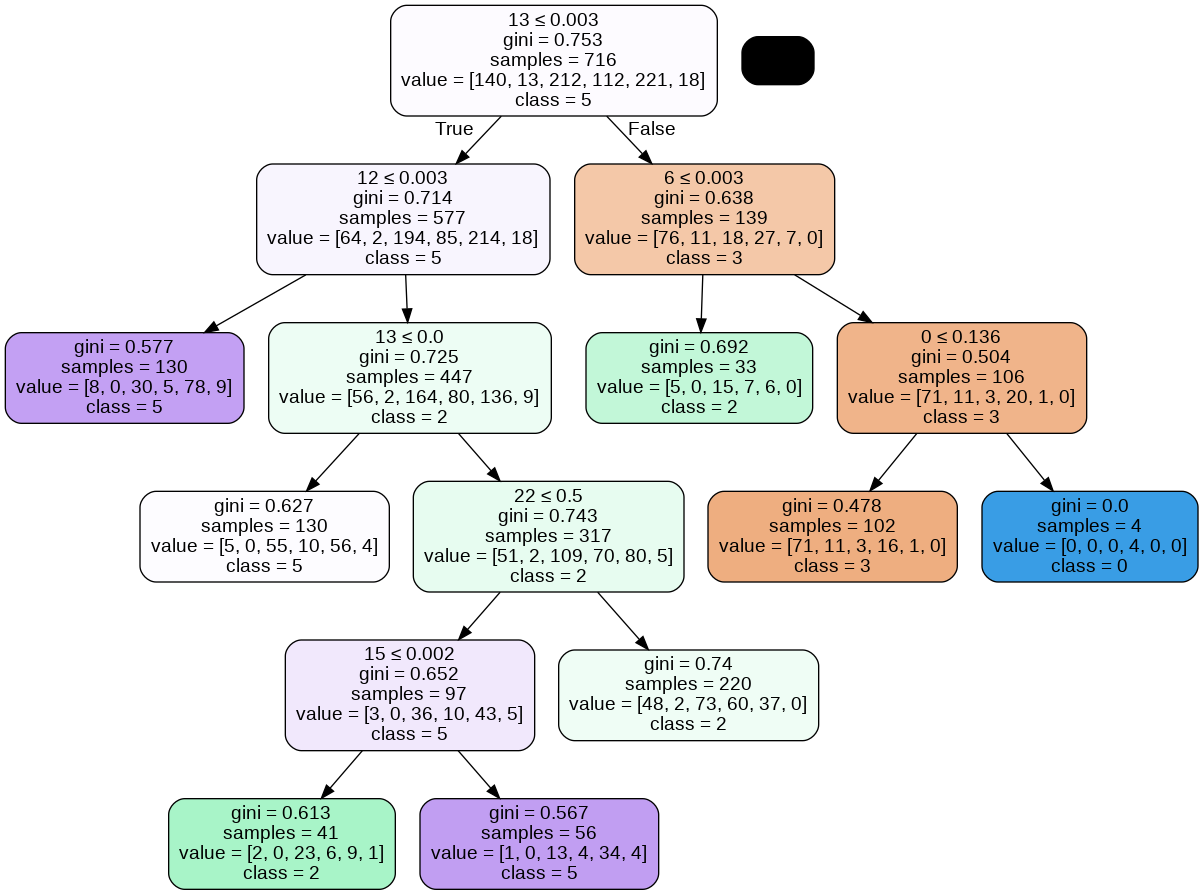

In [ ]:
# 트리의 최대 depth를 결정
clf = DecisionTreeClassifier(random_state=0, max_depth = 6, min_samples_split = 60, min_samples_leaf = 1, max_leaf_nodes = 8)

# max_depth: 트리의 최대 depth
# min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수
# min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수
# max_leaf_nodes: leaf node의 최대 개수

tree_prepruned = clf.fit(X_train, y_ESG_train)
draw_decision_tree(tree_prepruned, feature_names, class_name_ESG)

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

## 정밀도, 재현율

In [ ]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix


y_ESG_train_pred = clf.predict(X_train)

print(confusion_matrix(y_ESG_train, y_ESG_train_pred))

precision = precision_score(y_ESG_train, y_ESG_train_pred, average= "macro")
recall = recall_score(y_ESG_train, y_ESG_train_pred, average= "macro")

print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

## Hyperparameter 임의 설정 후 F1 Score

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

In [ ]:
scoring = ['f1_macro']
tree_scores = cross_validate(tree_prepruned, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("F1 Score of pre-pruned tree (Hyperparameter 임의 설정) : {:.3f}".format(np.mean(tree_scores['test_f1_macro'])))

F1 Score of pre-pruned tree (Hyperparameter 임의 설정) : 0.253


# Hyperparameter tuning

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

# GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면
# 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [ ]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(5, 8)),  'min_samples_split': list(range(70, 80)), 'min_samples_leaf': list(range(60, 70)), 'max_leaf_nodes': list(range(15,25))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_ESG_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

In [ ]:
# 트리의 최대 depth를 결정
clf = DecisionTreeClassifier(random_state=0, max_depth = 5, min_samples_split = 70, min_samples_leaf = 60, max_leaf_nodes = 15)

# max_depth: 트리의 최대 depth
# min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수
# min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수
# max_leaf_nodes: leaf node의 최대 개수

tree_prepruning = clf.fit(X_train, y_ESG_train)
draw_decision_tree(tree_prepruning, feature_names, class_name_ESG)

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()
dt.fit(X_train, y_ESG_train)

hyperparamters = {'max_depth': list(range(1, 50)),  
                  'min_samples_split': list(range(1, 80)), 
                  'min_samples_leaf': list(range(1, 100)), 
                  'max_leaf_nodes': list(range(1, 100)),
                  'criterion': ['gini', 'entropy']}

# iteration 횟수 설정
n_iter = 1000

# RandomizedSearch 진행
rs = RandomizedSearchCV(dt, 
                        param_distributions=hyperparamters, 
                        n_iter = n_iter,
                        cv=5, verbose=3,
                        return_train_score = True)

rs.fit(X_train, y_ESG_train)
rs.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[CV 1/5] END criterion=entropy, max_depth=31, max_leaf_nodes=28, min_samples_leaf=1, min_samples_split=51;, score=(train=0.561, test=0.382) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=31, max_leaf_nodes=28, min_samples_leaf=1, min_samples_split=51;, score=(train=0.572, test=0.448) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=31, max_leaf_nodes=28, min_samples_leaf=1, min_samples_split=51;, score=(train=0.571, test=0.413) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=31, max_leaf_nodes=28, min_samples_leaf=1, min_samples_split=51;, score=(train=0.538, test=0.448) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=31, max_leaf_nodes=28, min_samples_leaf=1, min_samples_split=51;, score=(train=0.560, test=0.406) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=46, max_leaf_nodes=73, min_samples_leaf=1, min_samples_split=59;, score=(train=0.615, test=0.403) total time=   0.0s
[CV 2/5] END 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a floa

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 91,
 'min_samples_leaf': 24,
 'min_samples_split': 20}

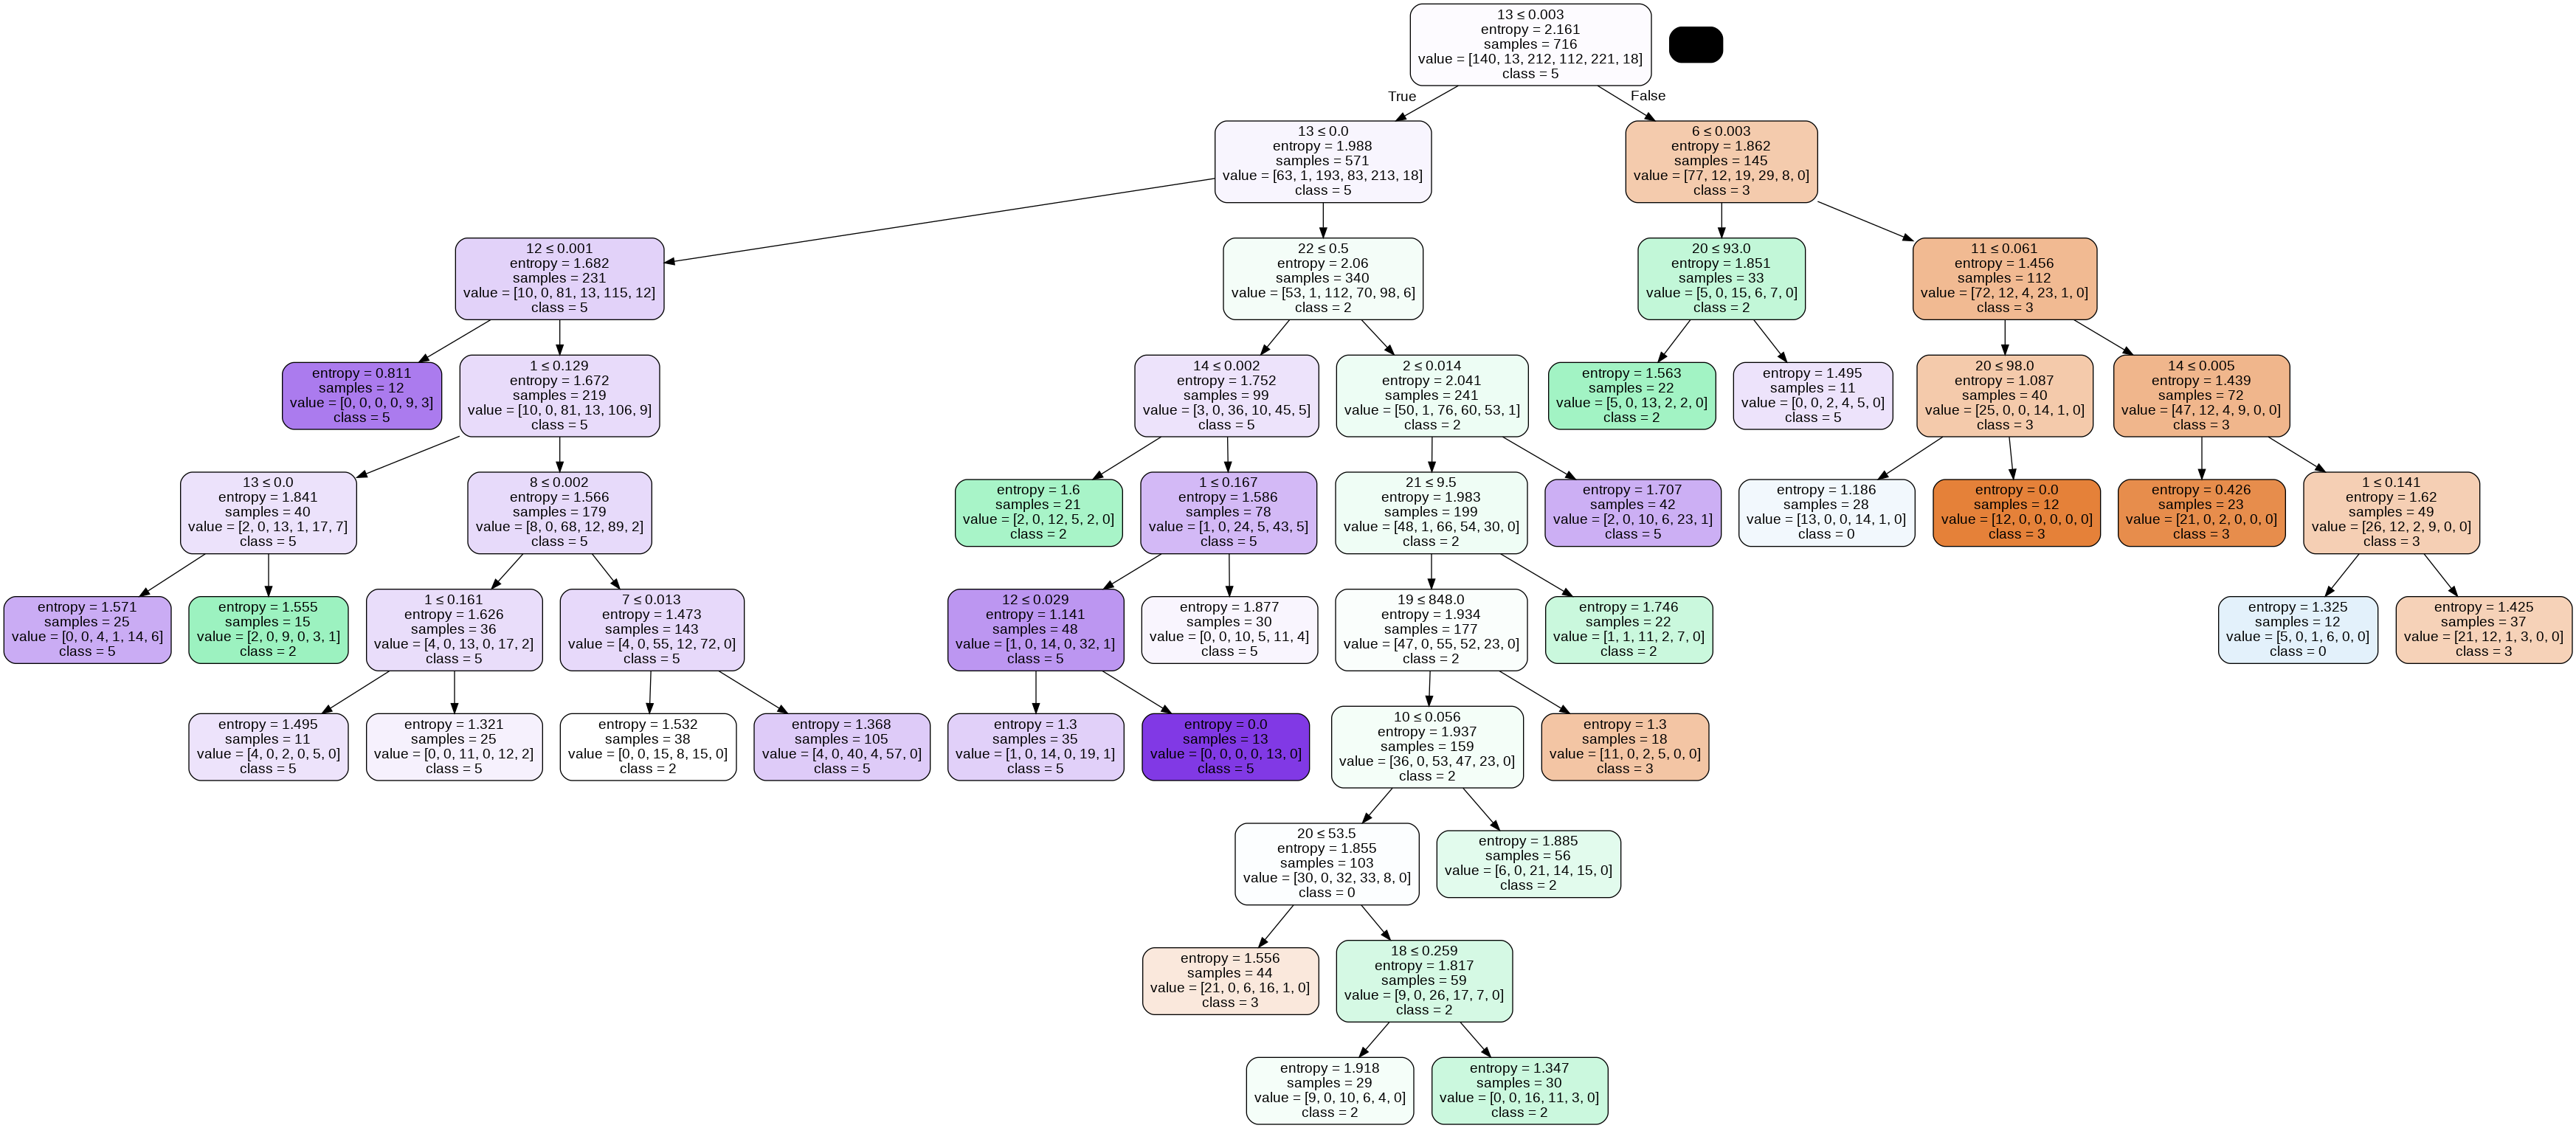

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth = 31, min_samples_split = 24, min_samples_leaf = 11, max_leaf_nodes = 25)

# max_depth: 트리의 최대 depth
# min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수
# min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수
# max_leaf_nodes: leaf node의 최대 개수

tree_randomized = clf.fit(X_train, y_ESG_train)
draw_decision_tree(tree_randomized, feature_names, class_name_ESG)

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

# Randomized Search 후 F1 Score

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth = 31, min_samples_split = 24, min_samples_leaf = 11, max_leaf_nodes = 25)

# max_depth: 트리의 최대 depth
# min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수
# min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수
# max_leaf_nodes: leaf node의 최대 개수

In [ ]:
tree_randomized = clf.fit(X_train, y_ESG_train)
draw_decision_tree(tree_randomized, feature_names, class_name_ESG)

tree_tuned_scores = cross_validate(tree_randomized, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("F1 Score of pre-pruned tree after hyperparameter tuning (train set) : {:.3f}".format(np.mean(tree_tuned_scores['test_f1_macro'])))

tree_tuned_scores = cross_validate(tree_randomized, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("F1 Score of pre-pruned tree after hyperparameter tuning (test set) : {:.3f}".format(np.mean(tree_tuned_scores['test_f1_macro'])))

F1 Score of pre-pruned tree after hyperparameter tuning (train set) : 0.263
F1 Score of pre-pruned tree after hyperparameter tuning (test set) : 0.225


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


# 사후 가지치기

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

#path = clf.cost_complexity_pruning_path(X_train, y_ESG_train)

# effective alphas, corresponding total leaf impurities 구하기
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# effective alpha값에 따른 total impurity of leaves 그래프

fig, ax = plt.subplots()
# plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
# axes: 좌표평면을 나타내는 변수

# ccp_alphas[-1]은 노드가 하나밖에 없는 트리임.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# alpha 값이 커지면 트리가 작아짐 -> total impurity of leaves 커짐

In [ ]:
# - 각 effective alphas 이용해 decision tree 만들기
# effective alpha 값에 대응하는 sub-trees 시각화

clfs = []
count = 0
for ccp_alpha in ccp_alphas:
    # 각 effective alphas 이용해 decision tree 만들기
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_ESG_train)
    count += 1
    print("Number of nodes in the {}th tree is: {} with ccp_alpha: {}".format(
      count, clf.tree_.node_count, ccp_alpha))
    display(draw_decision_tree(clf, feature_names, class_name_ESG))
    clfs.append(clf)
    print("====================================================================================")

# ccp_alpha = 0 일 때는 not-pruned full tree
# ccp_alpha를 0부터 시작해서 크기를 늘려감, effective alpha를 지나면 가지치기
# 마지막에는 root node만 남음
# alpha에 따라서 subtree의 크기를 조정할 수 있음을 확인

In [ ]:
# alpha값에 따른 node 수의 트리의 깊이

# 노드가 하나뿐인 마지막 tree는 제외
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# tree의 node 수
node_counts = [clf.tree_.node_count for clf in clfs]

# tree의 depth
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
# Number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# Depth vs alpha
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# alpha 값이 커지면 트리는 작아지므로, node의 수와 트리의 깊이도 작아짐

- Accuracy vs alpha for training and testing sets
  - alpha 값에 대응하는 subtree의 성능 확인

In [ ]:
# testing accuracy를 높이는 최고의 ccp_alpha는?

train_scores = [clf.score(X_train, y_ESG_train) for clf in clfs]
test_scores = [clf.score(X_test, y_ESG_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# print("Decision tree without pruning : {0} nodes, {1:.3} accuracy".format(tree_nottuned.tree_.node_count, tree_nottuned.score(X_test, y_ESG_test)))
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, max(test_scores)))

# 가장 높은 accuracy를 보이는 ccp_alpha 값은 약 0.013
# effective alpha = 약 0.013일 때 가장 높은 성능을 가지는 sub-tree가 만들어짐

In [ ]:
# testing accuracy를 높이는 최고의 ccp_alpha
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf = clf.fit(X_train, y_ESG_train)
draw_decision_tree(clf, feature_names, class_name_ESG)

# sub-trees 중 가장 성능 좋음
# overfitting 방지되었다고 추정

# 오버샘플링

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3)

In [ ]:
o_X, o_y_ESG = oversampling_instance.fit_resample(X, y_ESG)

In [ ]:
o_X_train, o_X_test, o_y_ESG_train, o_y_ESG_test = train_test_split(o_X, o_y_ESG, random_state=42) 

## 오버샘플링 & Randomized Search 후

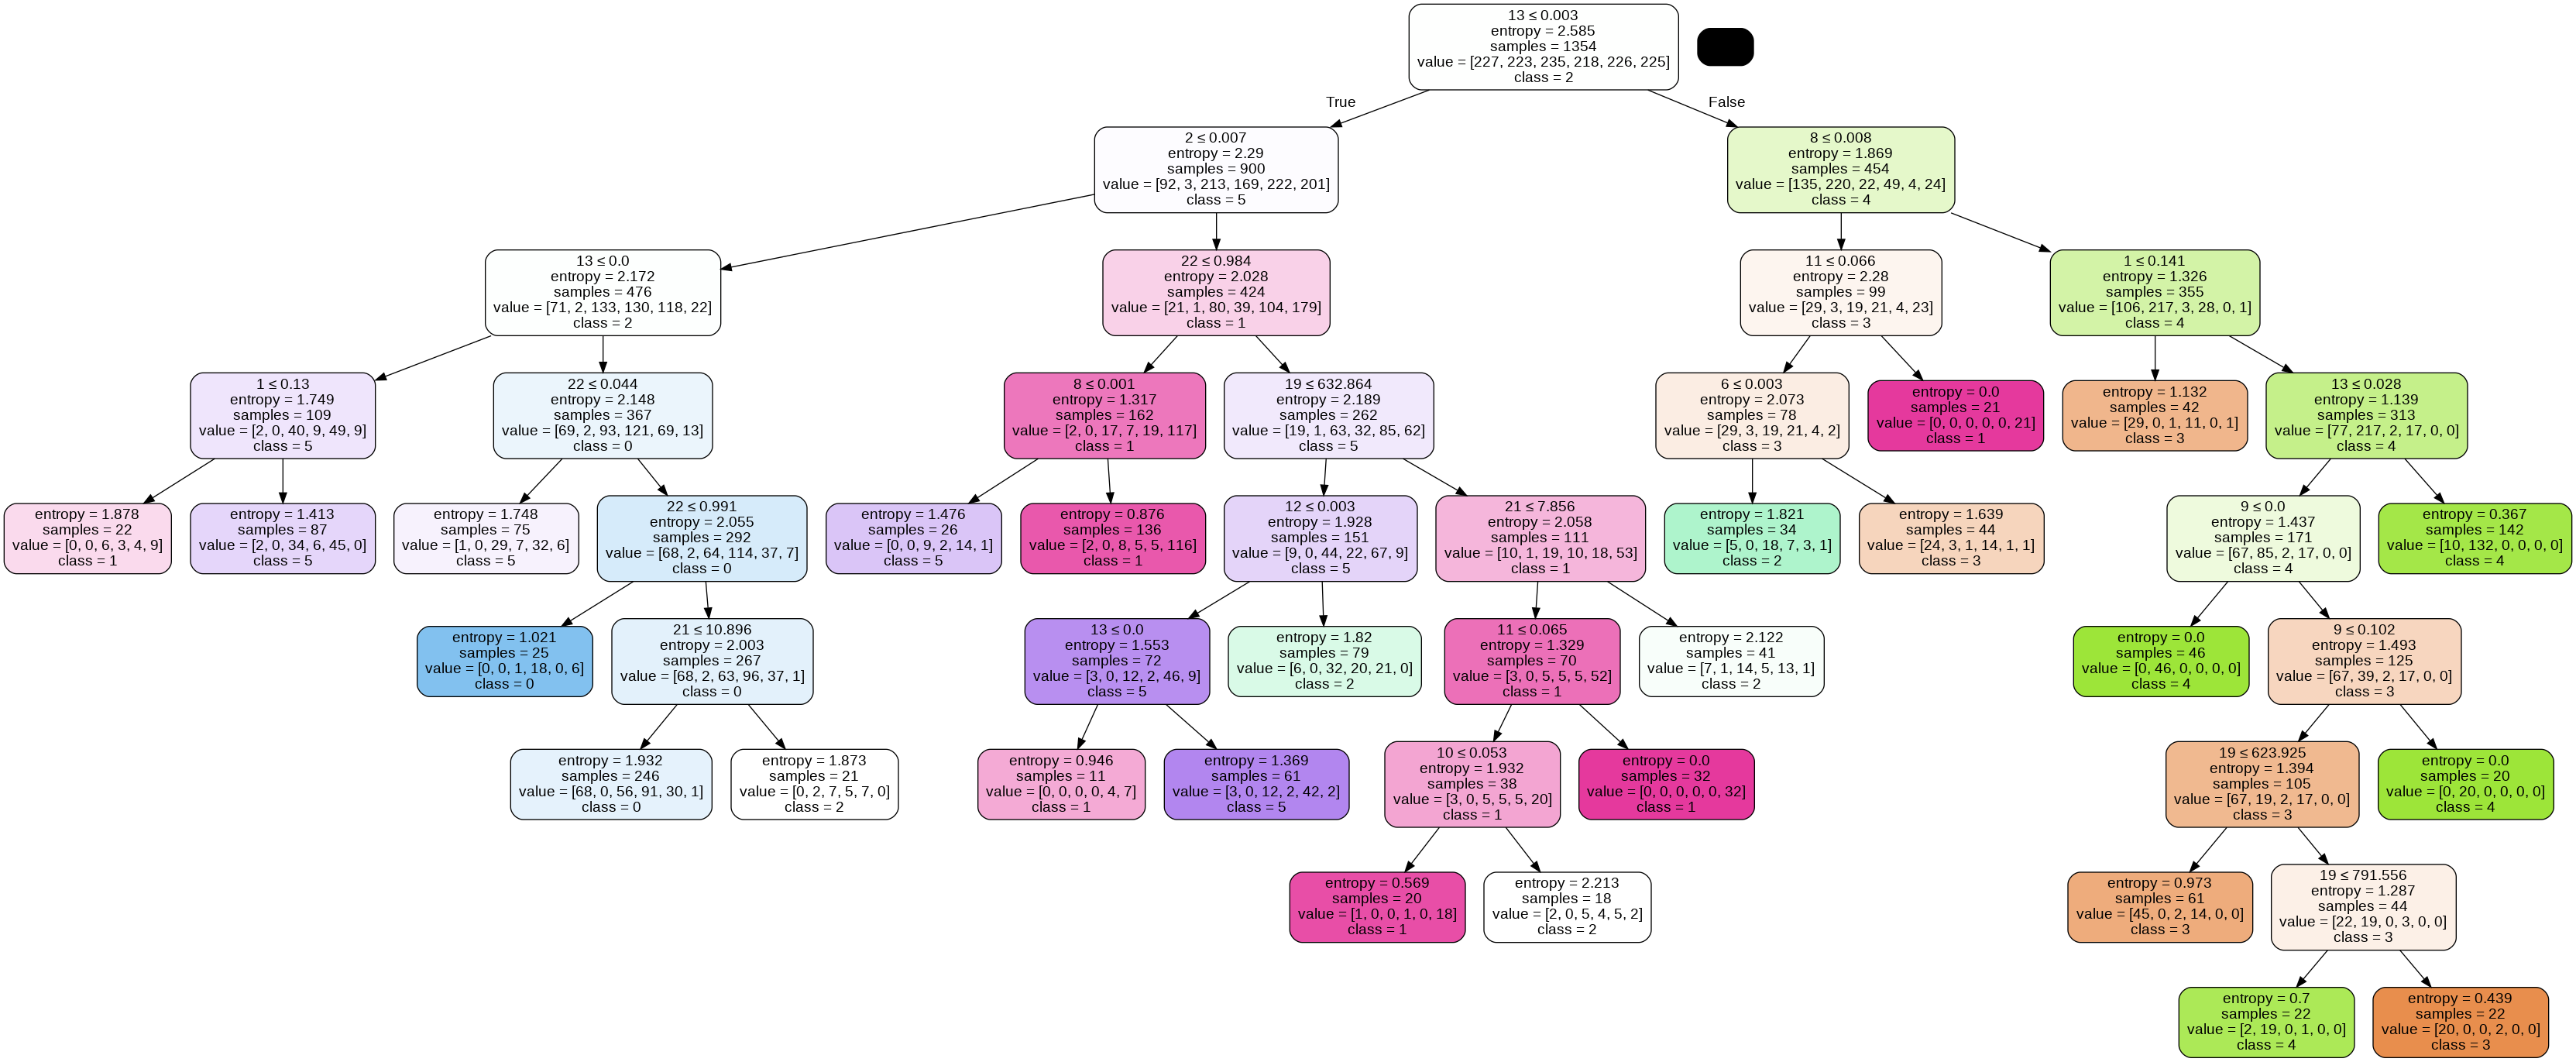

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth = 31, min_samples_split = 24, min_samples_leaf = 11, max_leaf_nodes = 25)

tree_oversampling = clf.fit(o_X_train, o_y_ESG_train)
draw_decision_tree(tree_oversampling, feature_names, class_name_ESG)

##  F1 Score

In [1]:
# train set
tree_tuned_scores = cross_validate(tree_oversampling, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("Tree parameter after Oversampling - F1 Score (train set): {:.3f}".format(np.mean(tree_tuned_scores['test_f1_macro'])))

In [ ]:
# test set
tree_tuned_scores = cross_validate(tree_oversampling, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("Tree parameter after Oversampling - F1 Score (test set) : {:.3f}".format(np.mean(tree_tuned_scores['test_f1_macro'])))

# 변수 중요도

In [ ]:
!sudo apt install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
fontconfig set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(14,8))
plt.suptitle('Random Forest 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")